In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from scipy.interpolate import griddata

In [5]:
# old
vary_meta = pd.read_csv('/content/drive/MyDrive/UCL/ABMs/Sugarscape 2 Constant Growback vary_metabolism-table.csv',skiprows=6)
vary_vision = pd.read_csv('/content/drive/MyDrive/UCL/ABMs/Sugarscape 2 Constant Growback vary_vision-table.csv',skiprows=6)
vary_pop = pd.read_csv('/content/drive/MyDrive/UCL/ABMs/Sugarscape 2 Constant Growback vary_pop-table.csv',skiprows=6)
vary_sugar = pd.read_csv('/content/drive/MyDrive/UCL/ABMs/Sugarscape 2 Constant Growback vary_sugar-table.csv',skiprows=6)

# new
vary_pop_model1 = pd.read_csv('/content/drive/MyDrive/UCL/ABMs/model1 vary_pop-table.csv',skiprows=6)
vary_pop_model2 = pd.read_csv('/content/drive/MyDrive/UCL/ABMs/Sugarscape 2 Constant Growback vary_pop-table.csv',skiprows=6)
vary_visionpop_model1 = pd.read_csv('/content/drive/MyDrive/UCL/ABMs/model1 vary_vision_pop-table.csv',skiprows=6)
vary_visionpop_model2 = pd.read_csv('/content/drive/MyDrive/UCL/ABMs/Sugarscape 2 Constant Growback vary_vision_pop-table.csv',skiprows=6)

df1=vary_pop_model1
df2=vary_pop_model2
df3=vary_visionpop_model1
df4=vary_visionpop_model2

df1.rename(columns={'mean [metabolism] of turtles': 'average-metabolism'}, inplace=True)
df1.rename(columns={'mean [vision] of turtles': 'average-vision'}, inplace=True)

df2.rename(columns={'mean [metabolism] of turtles': 'average-metabolism'}, inplace=True)
df2.rename(columns={'mean [vision] of turtles': 'average-vision'}, inplace=True)

df3.rename(columns={'mean [metabolism] of turtles': 'average-metabolism'}, inplace=True)
df3.rename(columns={'mean [vision] of turtles': 'average-vision'}, inplace=True)

df4.rename(columns={'mean [metabolism] of turtles': 'average-metabolism'}, inplace=True)
df4.rename(columns={'mean [vision] of turtles': 'average-vision'}, inplace=True)

df3["turtle-counts-in-sugar-bins"] = df3["turtle-counts-in-sugar-bins"].apply(lambda x: list(map(int, x.strip("[]").split())))
df4["turtle-counts-in-sugar-bins"] = df4["turtle-counts-in-sugar-bins"].apply(lambda x: list(map(int, x.strip("[]").split())))

# Experiment 1
## Turtles in high sugar zone

In [6]:
X = df1[['initial-population']]
y = df1['count-turtles-in-max-sugar-zone']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

coefficient_immediate = model.coef_[0]
print("Coefficient:", coefficient_immediate)
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Coefficient: 0.14957015126050419
R-squared: 0.9624132761291061
Mean Squared Error: 113.71761987764705
Root Mean Squared Error: 10.663846392256739


In [7]:
X = df2[['initial-population']]
y = df2['count-turtles-in-max-sugar-zone']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

coefficient_constant = model.coef_[0]
print("Coefficient:", coefficient_constant)
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Coefficient: 0.04101723076923076
R-squared: 0.8831757841376182
Mean Squared Error: 28.930886843076923
Root Mean Squared Error: 5.378743983782545


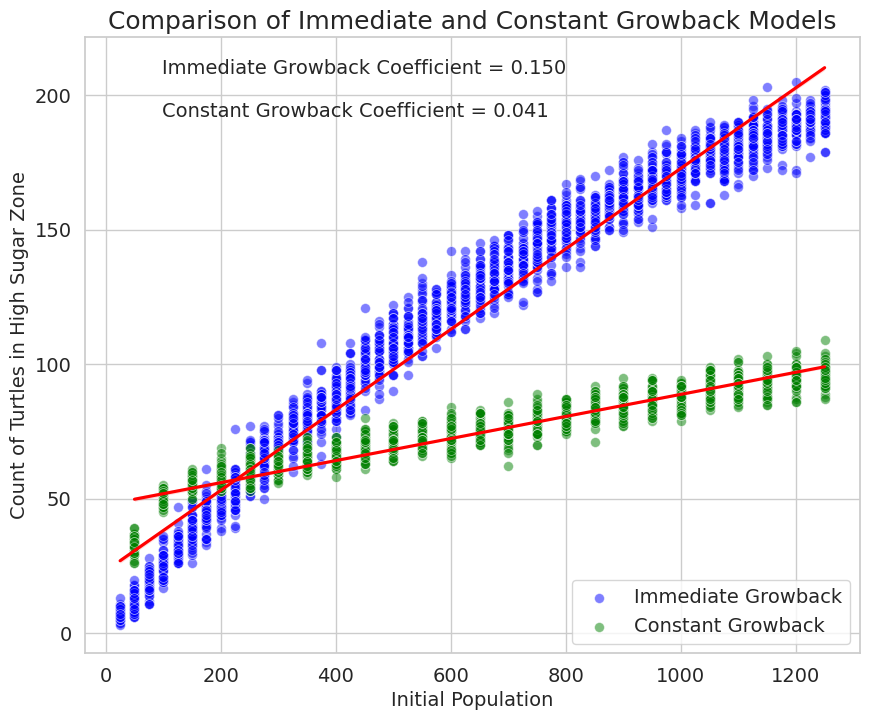

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Plot data from df1
sns.regplot(x='initial-population', y='count-turtles-in-max-sugar-zone', data=df1, scatter=False, line_kws={'color': 'red'})
sns.scatterplot(x='initial-population', y='count-turtles-in-max-sugar-zone', data=df1, label='Immediate Growback', color='blue', s=50, alpha=0.5)

# Plot data and regression line from df2
sns.regplot(x='initial-population', y='count-turtles-in-max-sugar-zone', data=df2, scatter=False, line_kws={'color': 'red'})
sns.scatterplot(x='initial-population', y='count-turtles-in-max-sugar-zone', data=df2, label='Constant Growback', color='green', s=50, alpha=0.5)

plt.text(x=0.1, y=0.94, s=f'Immediate Growback Coefficient = {coefficient_immediate:.3f}', transform=plt.gca().transAxes, fontsize=14)
plt.text(x=0.1, y=0.87, s=f'Constant Growback Coefficient = {coefficient_constant:.3f}', transform=plt.gca().transAxes, fontsize=14)

plt.title('Comparison of Immediate and Constant Growback Models', fontsize=18)
plt.xlabel('Initial Population', fontsize=14)
plt.ylabel('Count of Turtles in High Sugar Zone', fontsize=14)
plt.legend(fontsize=14, loc='lower right')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('linear-regplot_comparison.png', dpi=300)
plt.show()

# Experiment 2
## Variability of the outcomes

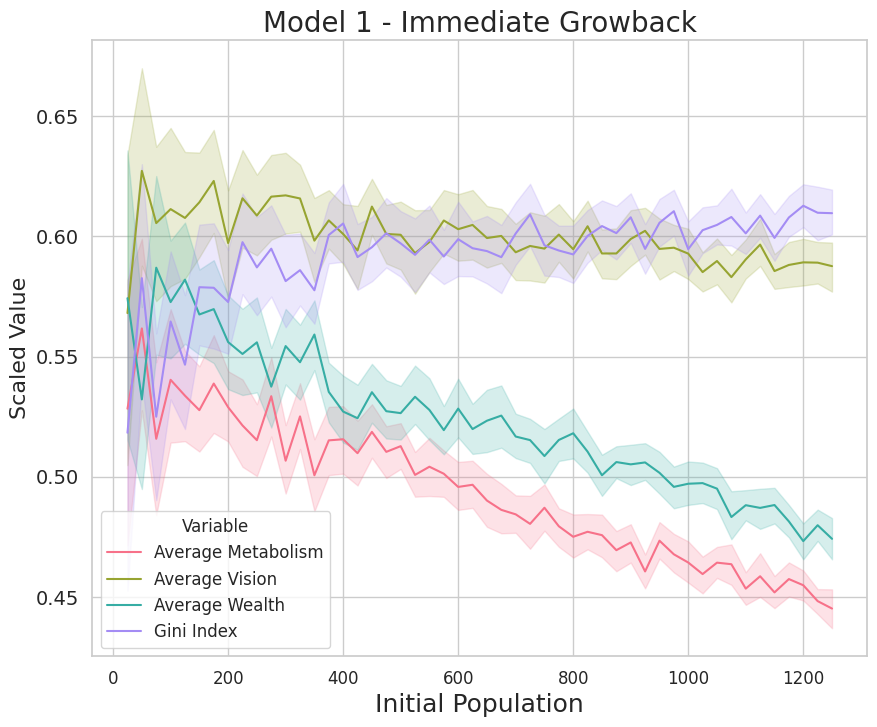

In [9]:
cols_to_include = ['average-metabolism', 'average-vision','average-wealth', 'gini-index']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df1[cols_to_include])
df_scaled = pd.DataFrame(df_scaled, columns=cols_to_include)
df_scaled = pd.concat([df1['initial-population'], df_scaled], axis=1)
melted_df = df_scaled.melt(id_vars='initial-population', var_name='variable', value_name='value')

# Plotting
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=melted_df, x='initial-population', y='value', hue='variable', palette='husl', legend='brief', err_style='band')

# Adding labels and title
plt.xlabel('Initial Population', fontsize=18)
plt.ylabel('Scaled Value', fontsize=16)
plt.title('Model 1 - Immediate Growback', fontsize=20)

# Customizing legend labels
variable_names = ['Average Metabolism', 'Average Vision', 'Average Wealth', 'Gini Index']
handles, labels = ax.get_legend_handles_labels()
unique_labels = set(labels)
plt.legend(handles[:len(unique_labels)], variable_names, title='Variable', loc='lower left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.savefig('plot_varsnonlinear_model1.png', dpi=240)
plt.show()

## Model 2

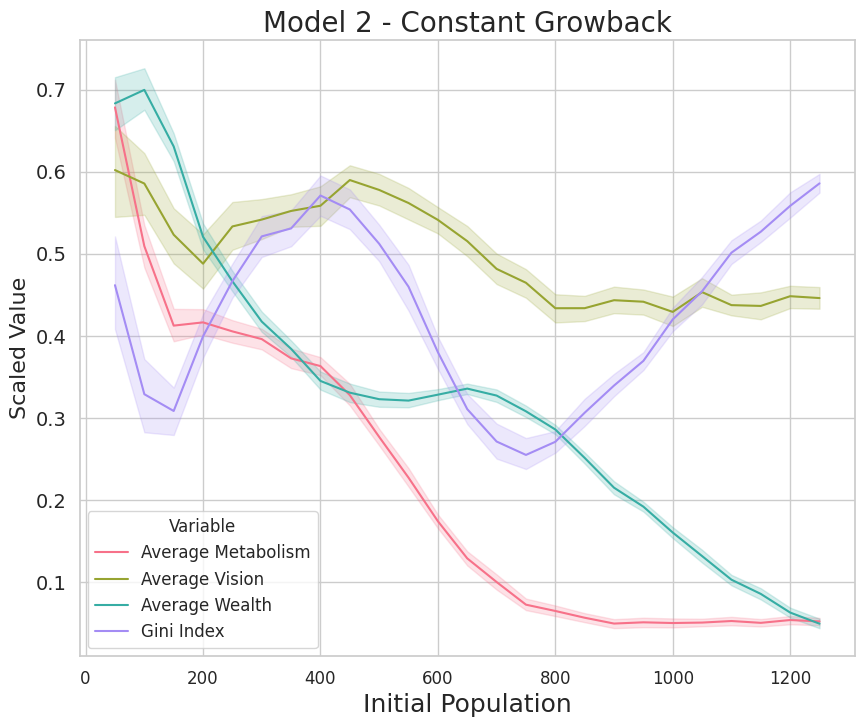

In [13]:
cols_to_include = ['average-metabolism', 'average-vision','average-wealth', 'gini-index']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df2[cols_to_include])
df_scaled = pd.DataFrame(df_scaled, columns=cols_to_include)
df_scaled = pd.concat([df2['initial-population'], df_scaled], axis=1)
melted_df = df_scaled.melt(id_vars='initial-population', var_name='variable', value_name='value')

# Plotting
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=melted_df, x='initial-population', y='value', hue='variable', palette='husl', legend='brief', err_style='band')

# Adding labels and title
plt.xlabel('Initial Population', fontsize=18)
plt.ylabel('Scaled Value', fontsize=16)
plt.title('Model 2 - Constant Growback', fontsize=20)

# Customizing legend labels
variable_names = ['Average Metabolism', 'Average Vision', 'Average Wealth', 'Gini Index']
handles, labels = ax.get_legend_handles_labels()
unique_labels = set(labels)
plt.legend(handles[:len(unique_labels)], variable_names, title='Variable', loc='lower left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.savefig('plot_varsnonlinear_model2.png', dpi=240)
plt.show()

# Experiment 3
## Wealth Distributions - varying two parameters at once

### Interpolation of median gini-index for different values of initial-population and max-vision

In [ ]:
df_agg = df3.groupby(['initial-population', 'max-vision'])['gini-index'].median().reset_index()
x = df_agg['initial-population']
y = df_agg['max-vision']
z = df_agg['gini-index']

xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='linear')

plt.figure(figsize=(8, 6))
plt.contourf(xi, yi, zi, cmap='viridis', levels=100)
plt.colorbar(label='Median Gini Index')
plt.xlabel('Initial Population', fontsize=14)
plt.ylabel('Max Vision', fontsize=14)
plt.title('Raster Density of Median Gini Index (Immediate Growback)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('density_plot_model1.png', dpi=300)
plt.show()

In [ ]:
### DF3 HIGHEST GINI INDEX
row_with_max_gini = df_agg.loc[df_agg['gini-index'].idxmax()]
print(row_with_max_gini)

filtered_df = df3[(df3['initial-population'] == 550) & (df3['max-vision'] == 4)]

highest_gini_row = filtered_df.loc[filtered_df['gini-index'].idxmax()]
bin_heights_highest = np.array(highest_gini_row['turtle-counts-in-sugar-bins'])
max_sugar_highest = highest_gini_row['max-sugar-of-turtles']
num_bins_highest = len(bin_heights_highest)
bin_range_highest = np.linspace(1, max_sugar_highest, num_bins_highest+1)
plt.bar(bin_range_highest[:-1], bin_heights_highest, width=np.diff(bin_range_highest), edgecolor='black')
plt.title('Highest Gini Index (Immediate Growback)', fontsize=18)
plt.xlabel('Sugar Wealth', fontsize=16)
plt.ylabel('Turtle Counts', fontsize=16)
plt.savefig('wealthdist_model1_highestgini.png', dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
### DF3 LOWEST GINI INDEX
row_with_min_gini = df_agg.loc[df_agg['gini-index'].idxmin()]
print(row_with_min_gini)

filtered_df = df3[(df3['initial-population'] == 50) & (df3['max-vision'] == 5)]
lowest_gini_row = filtered_df.loc[filtered_df['gini-index'].idxmin()]

bin_heights_lowest = np.array(lowest_gini_row['turtle-counts-in-sugar-bins'])
max_sugar_lowest = lowest_gini_row['max-sugar-of-turtles']
num_bins_lowest = len(bin_heights_lowest)
bin_range_lowest = np.linspace(1, max_sugar_lowest, num_bins_lowest+1)
plt.bar(bin_range_lowest[:-1], bin_heights_lowest, width=np.diff(bin_range_lowest), edgecolor='black')
plt.title('Lowest Gini Index (Immediate Growback)', fontsize=18)
plt.xlabel('Sugar Wealth', fontsize=16)
plt.ylabel('Turtle Counts', fontsize=16)
plt.savefig('wealthdist_model1_lowestgini.png', dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
df_agg = df4.groupby(['initial-population', 'max-vision'])['gini-index'].median().reset_index()
x = df_agg['initial-population']
y = df_agg['max-vision']
z = df_agg['gini-index']

xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='linear')

plt.figure(figsize=(8, 6))
plt.contourf(xi, yi, zi, cmap='viridis', levels=100)
plt.colorbar(label='Median Gini Index')
plt.xlabel('Initial Population', fontsize=14)
plt.ylabel('Max Vision', fontsize=14)
plt.title('Raster Density of Median Gini Index (Constant Growback)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('density_plot_model2.png', dpi=300)
plt.show()

In [ ]:
### DF4 HIGHEST GINI INDEX
row_with_max_gini = df_agg.loc[df_agg['gini-index'].idxmax()]
print(row_with_max_gini)

filtered_df = df4[(df4['initial-population'] == 1250) & (df4['max-vision'] == 6)]

highest_gini_row = filtered_df.loc[filtered_df['gini-index'].idxmax()]
bin_heights_highest = np.array(highest_gini_row['turtle-counts-in-sugar-bins'])
max_sugar_highest = highest_gini_row['max-sugar-of-turtles']
num_bins_highest = len(bin_heights_highest)
bin_range_highest = np.linspace(1, max_sugar_highest, num_bins_highest+1)
plt.bar(bin_range_highest[:-1], bin_heights_highest, width=np.diff(bin_range_highest), edgecolor='black')
plt.title('Highest Gini Index (Constant Growback)', fontsize=18)
plt.xlabel('Sugar Wealth', fontsize=16)
plt.ylabel('Turtle Counts', fontsize=16)
plt.savefig('wealthdist_model2_highestgini.png', dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
### DF4 LOWEST GINI INDEX
row_with_min_gini = df_agg.loc[df_agg['gini-index'].idxmin()]
print(row_with_min_gini)

filtered_df = df4[(df4['initial-population'] == 50) & (df4['max-vision'] == 5)]
lowest_gini_row = filtered_df.loc[filtered_df['gini-index'].idxmin()]

bin_heights_lowest = np.array(lowest_gini_row['turtle-counts-in-sugar-bins'])
max_sugar_lowest = lowest_gini_row['max-sugar-of-turtles']
num_bins_lowest = len(bin_heights_lowest)
bin_range_lowest = np.linspace(1, max_sugar_lowest, num_bins_lowest+1)
plt.bar(bin_range_lowest[:-1], bin_heights_lowest, width=np.diff(bin_range_lowest), edgecolor='black')
plt.title('Lowest Gini Index (Constant Growback)', fontsize=18)
plt.xlabel('Sugar Wealth', fontsize=16)
plt.ylabel('Turtle Counts', fontsize=16)
plt.savefig('wealthdist_model2_lowestgini.png', dpi=300)
plt.tight_layout()
plt.show()

## Summary statistics

In [ ]:
columns_of_interest = ['average-metabolism', 'average-vision','count-turtles-in-max-sugar-zone',
                       'gini-index', 'max-sugar-of-turtles']

summary_df1 = round(df1[columns_of_interest].describe(),3)
summary_df2 = round(df2[columns_of_interest].describe(),3)

print("Summary statistics for df1:")
print(summary_df1)

print("\nSummary statistics for df2:")
print(summary_df2)

# Other and tests

## Calculating Pareto coefficient as another measure of wealth inequality
### How quickly the distributions tails off

In [ ]:
# Define the function for Pareto distribution
def pareto_distribution(x, alpha, xm):
    return alpha * xm**alpha / x**(alpha + 1)

# Function to calculate Pareto exponent for each row
def calculate_pareto_exponent(row):
    # Wealth distribution for current row
    bin_heights = np.array(row['turtle-counts-in-sugar-bins'])
    bin_range = np.linspace(1, row['max-sugar-of-turtles'], len(bin_heights) + 1)
    wealth_values = (bin_range[:-1] + bin_range[1:]) / 2

    # Define the cumulative distribution function (CDF)
    cdf = np.cumsum(bin_heights[::-1])[::-1]

    # Fit the CDF to the Pareto distribution
    try:
        params, _ = curve_fit(pareto_distribution, wealth_values, cdf, p0=[1, min(wealth_values)],maxfev=10000)
        alpha, _ = params
        return alpha
    except:
        return np.nan  # Return NaN if fitting fails

df1['pareto_exponent'] = df1.apply(calculate_pareto_exponent, axis=1)
df2['pareto_exponent'] = df2.apply(calculate_pareto_exponent, axis=1)
df3['pareto_exponent'] = df3.apply(calculate_pareto_exponent, axis=1)
df4['pareto_exponent'] = df4.apply(calculate_pareto_exponent, axis=1)

### Didn't end up using this measure in the report as it would be too much for the word count

In [ ]:
### DF1 LOWEST AND HIGHEST GINI INDEX
highest_gini_row = df1.loc[df1['gini-index'].idxmax()]
lowest_gini_row = df1.loc[df1['gini-index'].idxmin()]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot for highest gini index row
bin_heights_highest = np.array(highest_gini_row['turtle-counts-in-sugar-bins'])
max_sugar_highest = highest_gini_row['max-sugar-of-turtles']
num_bins_highest = len(bin_heights_highest)
bin_range_highest = np.linspace(1, max_sugar_highest, num_bins_highest+1)
axs[0].bar(bin_range_highest[:-1], bin_heights_highest, width=np.diff(bin_range_highest), edgecolor='black')
axs[0].set_title('Highest Gini Index')
axs[0].set_xlabel('Sugar Bins')
axs[0].set_ylabel('Turtle Counts')

# Plot for lowest gini index row
bin_heights_lowest = np.array(lowest_gini_row['turtle-counts-in-sugar-bins'])
max_sugar_lowest = lowest_gini_row['max-sugar-of-turtles']
num_bins_lowest = len(bin_heights_lowest)
bin_range_lowest = np.linspace(1, max_sugar_lowest, num_bins_lowest+1)
axs[1].bar(bin_range_lowest[:-1], bin_heights_lowest, width=np.diff(bin_range_lowest), edgecolor='black')
axs[1].set_title('Lowest Gini Index')
axs[1].set_xlabel('Sugar Bins')
axs[1].set_ylabel('Turtle Counts')

plt.tight_layout()  # Adjust layout
plt.show()